PCA Example

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')

### 1. Select only the numeric columns

In [3]:
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

### 3. Handle missing values

In [4]:
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(df[numerical_cols])

Convert back to a DataFrame

In [5]:
data_clean = pd.DataFrame(data_imputed, columns=numerical_cols)

### 4. Standardize (important for PCA)
PCA is affected by feature scale- we scale all features to have mean=0 and std=1

In [6]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

### 5. Apple PCA
Lets keep upto 7 components (can be fewer than no of columns)

In [7]:
pca = PCA(n_components=1)
data_pca = pca.fit_transform(data_scaled)

### 6. Chec how much information each component keeps

In [8]:
explained_variance = pca.explained_variance_ratio_      # % of total info (variance) captured by each component
cumulative_variance = np.cumsum(explained_variance)    # cumulative total

### 7. Plot cumulative variance

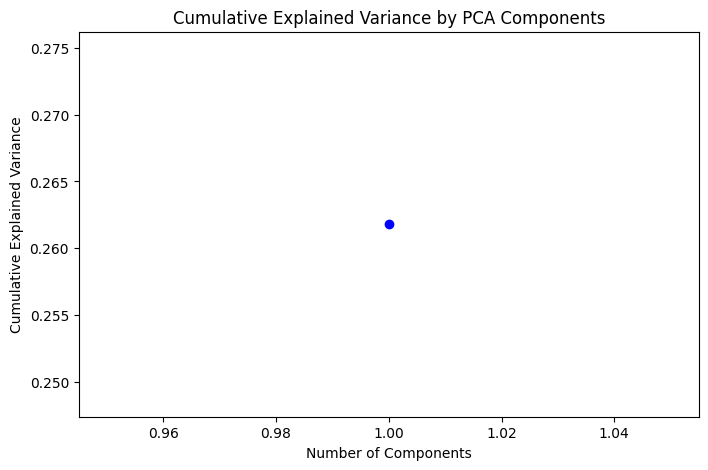

In [9]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='blue')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

### 8. Print variance info

In [10]:
print("Explained Variance Ratio (each PC shows how much info it captures):\n", explained_variance.round(3))

Explained Variance Ratio (each PC shows how much info it captures):
 [0.262]


### 9. Find feature contribution (loadings)
Loadings tell us how each original feature contributes to each principal component

In [11]:
loadings = pd.DataFrame(pca.components_.T,          #transpose to get features as rows
                         columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                         index=numerical_cols)

## Add-on: Logistic Regression

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### 10. Select Optimal Number of Components (e.g for 95% variance)
Find the index of the first component where cumulative variance is >= 0.95

In [13]:
index_of_85 = np.argmax(cumulative_variance>=0.95)

np.argmax returns the index of the first 'True'. If no True is found, it returns 0.
We must check if the 95% target was actually reached at that index

In [14]:
if cumulative_variance[index_of_85] < 0.95:
    n_opt = index_of_85 + 1
else:
    #if the target was NOT reached, use all avalible components
    n_opt = len(explained_variance)

print(f"Optimal number of components to retain 95% variance: {n_opt}")

Optimal number of components to retain 95% variance: 1


Use the optimally reduced data for modelling

In [15]:
X_pca_reduced = data_pca[:, :n_opt]

### 11. Prepare Data and Model

In [16]:
y = df['Outcome']

Split the data into training and testing sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.3, random_state=42, stratify=y)

Initialize and train the Logistic Regression model

In [20]:
log_reg = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


### 12. Predict and Evaluate

In [22]:
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.7316
